# Ford GoBike System Data Visualization
## by Betizazu Alemu

## Investigation Overview

> In this presentation, I wanted to look at what is the ratio of user types, their usage hourly in a day, and their usage distributed weekday hourly usage

## Dataset Overview

> Ford GoBike System Dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in the month of February, 2019.  
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in the year 2019. The data set has been stored as a csv file, it has 12 features and 183412 entries. The features are:
> - duration_min - Ridden time in min
> - start_time - Ride start time
> - end_time - Ride end time
> - start_station_name - Ride start station name
> - end_station_name - Ride end station name
> - bike_id - Ride bike id
> - user_type - User type either Subscriber or Customer
> - member_gender - Member gender
> - bike_share_for_all_trip - If the bike is used for the round trip
> - age - Rider age
> - age - Rider age grouped under the 10s
> - weekday - the name of weekday extracted from start_time feature

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

# default sns theme
sns.set_style('darkgrid')

In [8]:
# load in the dataset into a pandas dataframe
gobike_df = pd.read_csv("./Dataset/final-analysis.csv")

gobike_df.start_time = pd.to_datetime(gobike_df.start_time)

In [4]:
# Defining Helper function
# base color to make all graph similar
base_color = sns.color_palette()[0]


def figure_basics(title: str, xlabel: str="", ylabel: str="", x_double: bool=False, y_double: bool=False):
    """A function to setup shared setting between graphs

    Args:
        title (str): Graph title
        xlabel (str, optional): Text for x label. Defaults to "".
        ylabel (str, optional): Text for y label. Defaults to "".
        x_double (bool, optional): A boolean value to make the graph double in size in x axis. Defaults to False.
        y_double (bool, optional): A boolean value to make the graph double in size in y axis. Defaults to False.
    """
    plt.figure(figsize=(24 if x_double else 12, 16 if y_double else 8))
    
    plt.title(title, fontsize=18, fontweight='bold')
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)

## Distribution of User Types

The plot shows almost 90% of the bike users are subscribers.

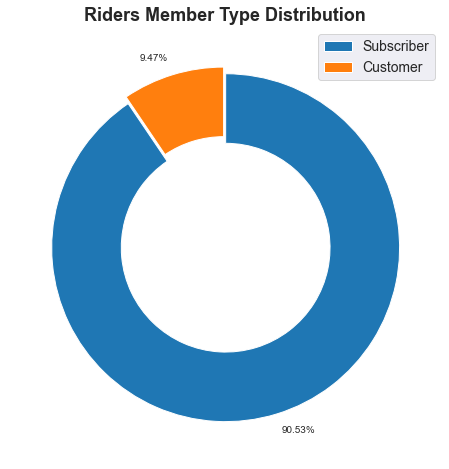

In [5]:
# getting the count of member values
member_counts = np.round(gobike_df['user_type'].value_counts(normalize=True) * 100, 2)

# Plotting the graph
figure_basics("Riders Member Type Distribution")
plt.pie(member_counts, labels=[f"{str(x)}%" for x in member_counts.values],
        startangle=90, explode=np.repeat(0.02, len(member_counts.index)),
        counterclock=False, wedgeprops = {'width' : 0.4});
plt.legend(member_counts.index, fontsize=14);

## User Type Vs Ride Duration Distribution

I would like to show what the ride duration distribution look like for each user type. Since there are outliers found in ride duration, I will first visualize the graph without any limitation in the left, and I will draw the limited (i.e., between 0 - 100 min) version of the graph in right side since most of the durations not last more than 100 mins.

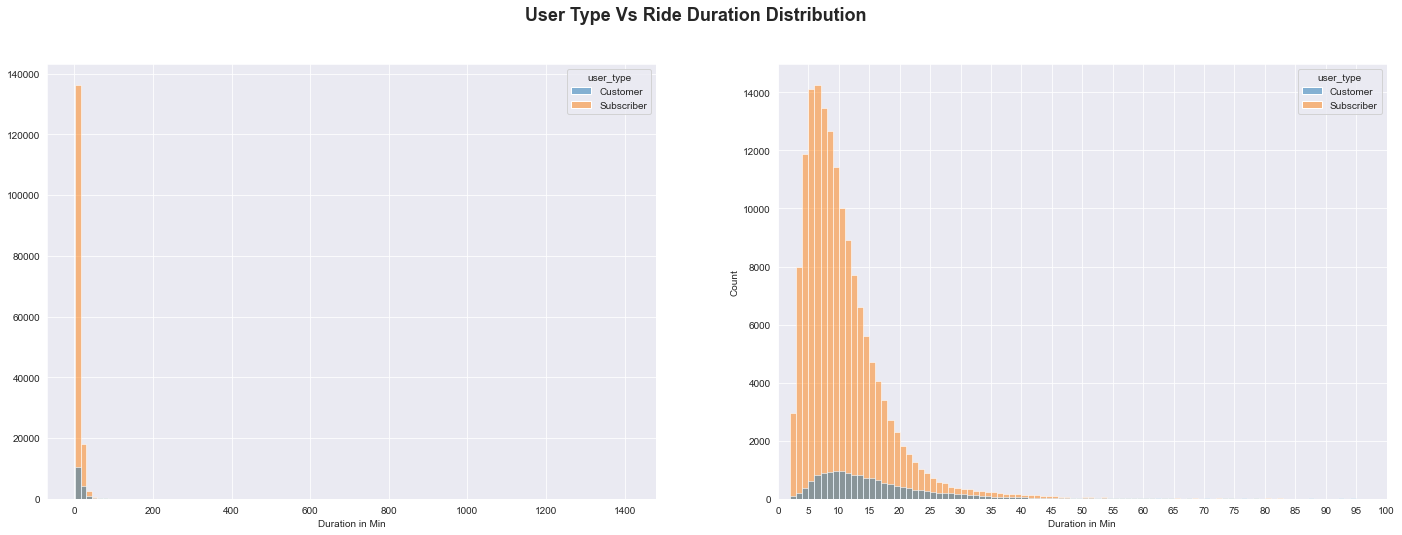

In [6]:
# plotting the graph
fig, ax = plt.subplots(1, 2, figsize=(24, 8))

plt.suptitle("User Type Vs Ride Duration Distribution", fontsize=18, fontweight='bold')

sns.histplot(data=gobike_df, x='duration_min', hue="user_type", bins=100, ax=ax[0])
ax[0].set_xlabel("Duration in Min")
ax[0].set_ylabel("")

sns.histplot(data=gobike_df, x='duration_min', hue="user_type", bins=range(101), ax=ax[1])
ax[1].set_xlabel("Duration in Min")
plt.xlim((0, 100))
plt.xticks(ticks=range(0, 105, 5));

## User Type Vs Hourly Ride Distribution
  
The following graph shows what the user types ride distribution looks like for each hours in a day.

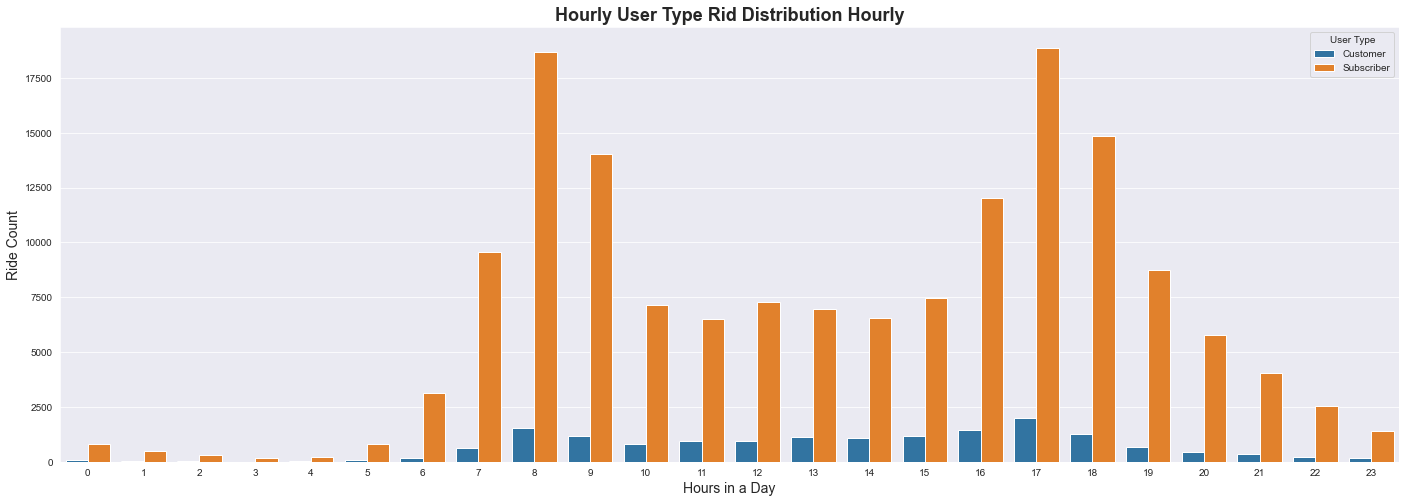

In [9]:
# calculating the hourly rides
hourly_count = gobike_df.groupby([gobike_df.start_time.dt.hour, 'user_type']).duration_min.count()
hourly_count = hourly_count.reset_index(name='count')

# drawing the graph
figure_basics("Hourly User Type Rid Distribution Hourly", x_double=True)
plot = sns.barplot(data=hourly_count, x='start_time', y='count', hue='user_type')
plot.set_xlabel("Hours in a Day", fontsize=14)
plot.set_ylabel("Ride Count", fontsize=14)
plt.legend(title="User Type");

## User Type, Hourly Ride, and Weekday Distribution
  
The following graph shows which user type ride bikes more frequent at what time during the weekdays.

In [10]:
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# adding one additional column
gobike_df["weekday"] = gobike_df.start_time.dt.weekday

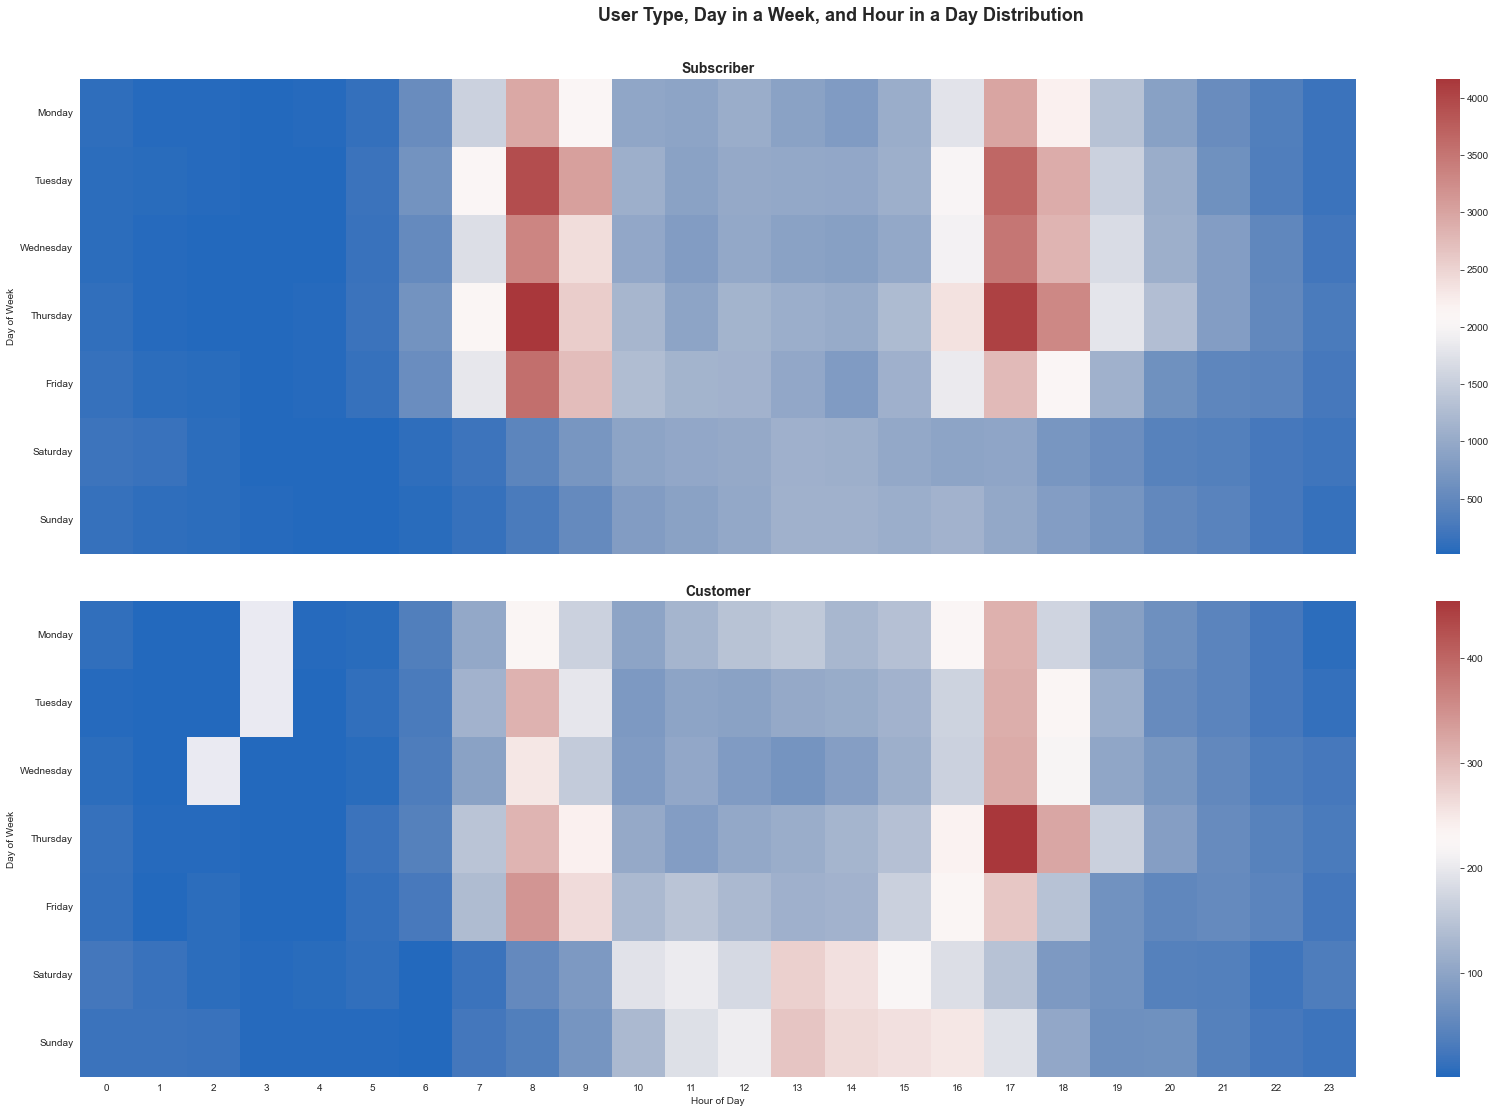

In [11]:
# plotting the graph
fig, ax = plt.subplots(2, 1, figsize=(24, 16), sharex=True)

plt.suptitle("User Type, Day in a Week, and Hour in a Day Distribution", fontsize=18, fontweight='bold')

# Subscribers graph
subscribers = gobike_df[gobike_df.user_type == 'Subscriber']
subscribers_count = subscribers.groupby([gobike_df.weekday, gobike_df.start_time.dt.hour]).size().reset_index(name='count')
subscribers_count = subscribers_count.pivot(index='weekday', columns='start_time', values='count')

sns.heatmap(subscribers_count, cmap='vlag', ax=ax[0])
ax[0].set_title('Subscriber', loc='center', fontsize=14, fontweight='bold')
ax[0].set_xlabel('')
ax[0].set_ylabel('Day of Week')
ax[0].set_yticks(ticks=np.array(range(7)) + 0.5, labels=day_names, rotation=0)

# Customers graph
customers = gobike_df[gobike_df.user_type == 'Customer']
customers_count = customers.groupby([gobike_df.weekday, gobike_df.start_time.dt.hour]).size().reset_index(name='count')
customers_count = customers_count.pivot(index='weekday', columns='start_time', values='count')

sns.heatmap(customers_count, cmap='vlag', ax=ax[1])
plt.title('Customer', loc='center', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
ax[1].set_yticks(ticks=np.array(range(7)) + 0.5, labels=day_names, rotation=0)

fig.tight_layout(pad=3.0);

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [2]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_Full_Analysis.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_Full_Analysis.ipynb to slides
[NbConvertApp] Writing 757287 bytes to Part_II_Full_Analysis.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Bitzs\.pyenv\pyenv-win\versions\3.10.5\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\Bitzs\.pyenv\pyenv-win\versions\3.10.5\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\Bitzs\.pyenv\pyenv-win\versions\3.10.5\Scripts\jupyter-nbconvert.EXE\__main__.py", line 7, in <module>
  File "C:\Users\Bitzs\.pyenv\pyenv-win\versions\3.10.5\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\Bitzs\.pyenv\pyenv-win\versions\3.10.5\lib\site-packages\traitlets\config\application.py", line 976, in launch_instan